ThinkDSP, by Allen Downey

This notebook contains code examples from Chapter 2: Harmonics

In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

%precision 3
%matplotlib inline

Create a triangle signal and plot a 3 period segment.

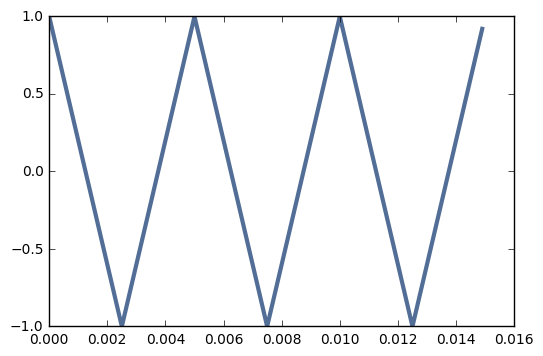

In [2]:
signal = thinkdsp.TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()

Make a 1-second wave and play it.

In [3]:
segment = signal.make_wave(duration=1, framerate=10000)
segment.apodize()
segment.make_audio()

Make a 0.5 second wave and compute its spectrum.

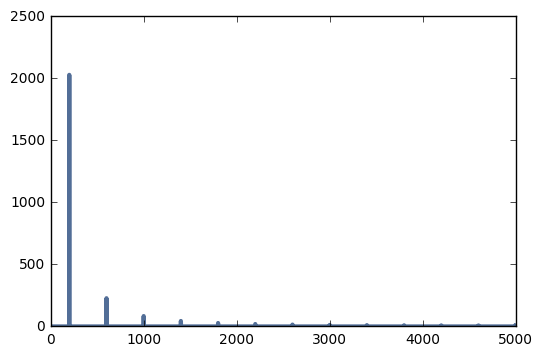

In [4]:
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()

Make a square signal and plot a 3 period segment.

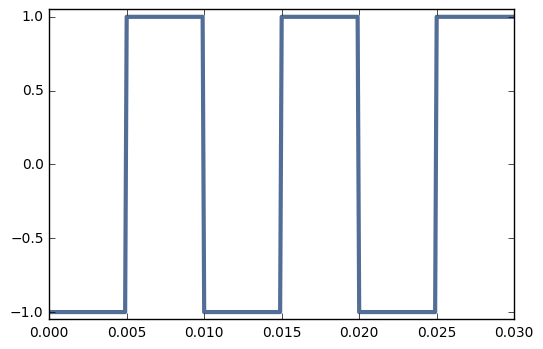

In [5]:
signal = thinkdsp.SquareSignal(100)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
thinkplot.config(ylim=[-1.05, 1.05], legend=False)

Make a 1 second wave and play it.

In [6]:
segment = signal.make_wave(duration=1, framerate=10000)
segment.apodize()
segment.make_audio()

Make a 0.5 second wave and compute its spectrum.

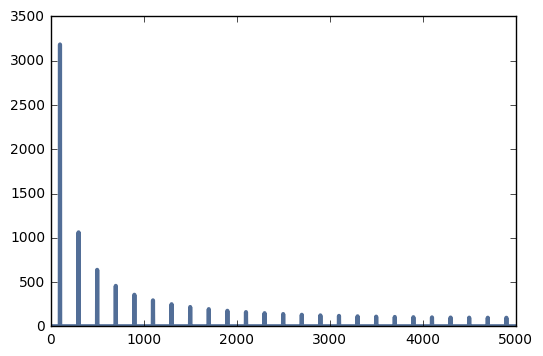

In [7]:
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

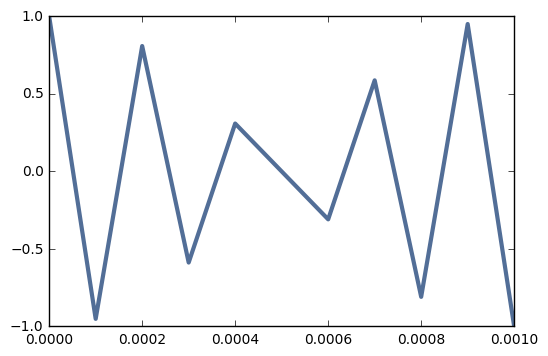

In [8]:
framerate = 10000

signal = thinkdsp.CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

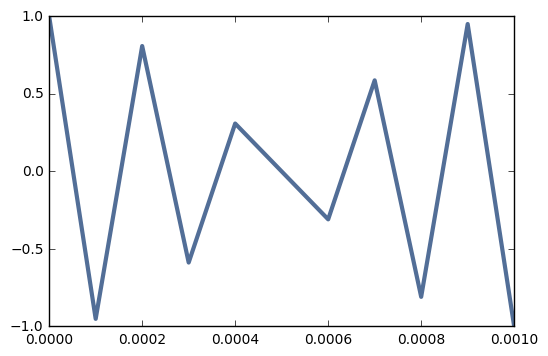

In [9]:
signal = thinkdsp.CosSignal(5500)
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

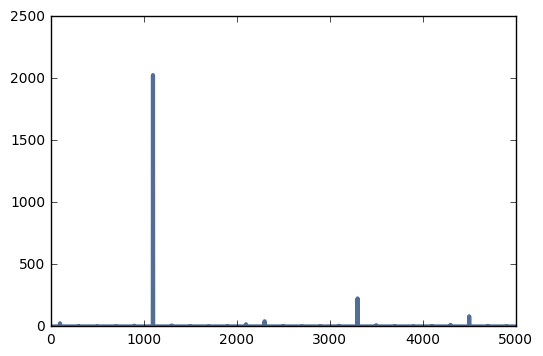

In [10]:
signal = thinkdsp.TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()

Explore the implementation of Wave.make_spectrum.  Make a triangle wave.

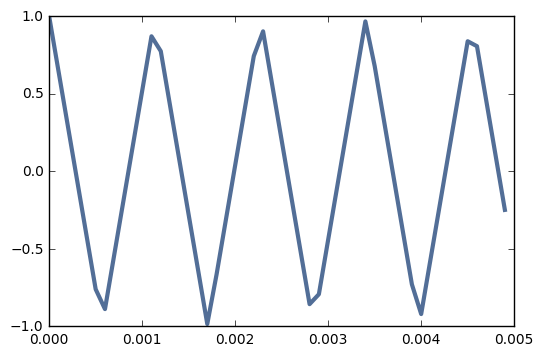

In [11]:
signal = thinkdsp.TriangleSignal(880)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()

Play it.

In [12]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [13]:
import numpy
hs = numpy.fft.rfft(wave.ys)
hs

array([ -1.672e-12 +0.000e+00j,   1.323e-12 +1.829e-12j,
         1.162e-12 -1.242e-12j, ...,  -1.561e-13 -4.560e-13j,
        -1.689e-12 +1.213e-15j,   7.471e-13 +0.000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [14]:
f_max = framerate / 2.0
fs = numpy.linspace(0, f_max, len(hs))

Plot the magnitudes vs the frequencies.

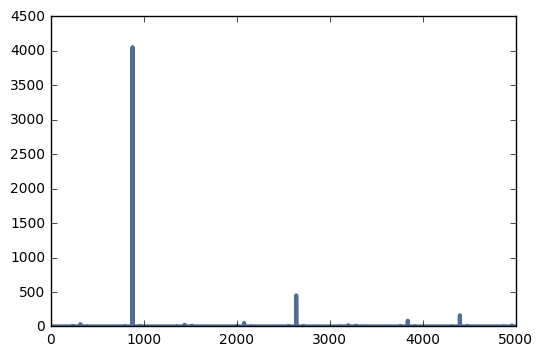

In [15]:
magnitude = numpy.absolute(hs)
thinkplot.plot(fs, magnitude)

Plot the phases vs the frequencies.

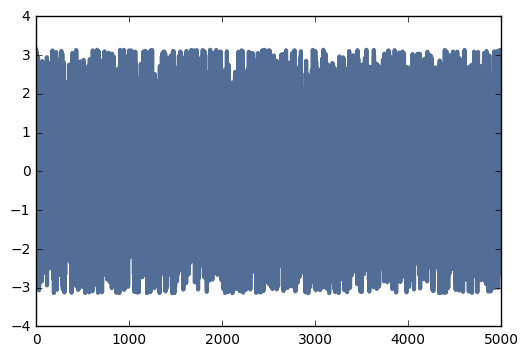

In [16]:
angle = numpy.angle(hs)
thinkplot.plot(fs, angle)

Shuffle the phases.

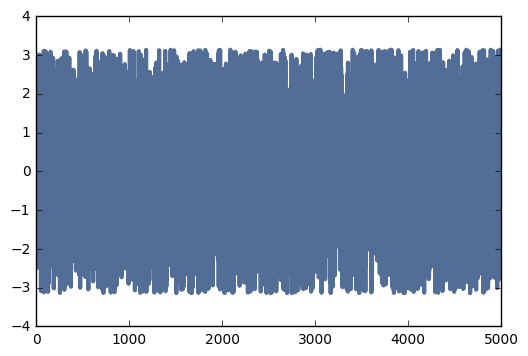

In [17]:
import random
random.shuffle(angle)
thinkplot.plot(fs, angle)

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, we we compute $A e^{i \phi}$

In [18]:
i = complex(0, 1)
spectrum.hs = magnitude * numpy.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

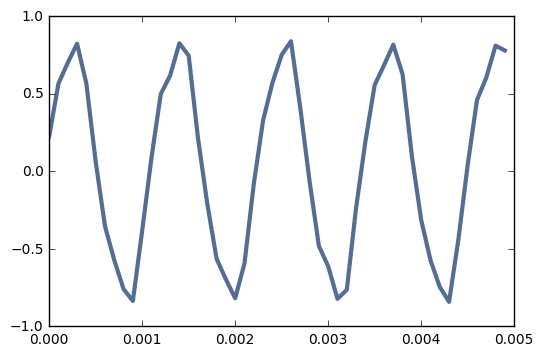

In [19]:
wave = spectrum.make_wave()
segment = wave.segment(duration=0.005)
segment.plot()

Play the wave with the shuffled phases.

In [20]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [21]:
def view_harmonics(freq, framerate):
    signal = thinkdsp.SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.1, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='blue')
    thinkplot.config(xlabel='frequency', ylabel='amplitude')

<function __main__.view_harmonics>

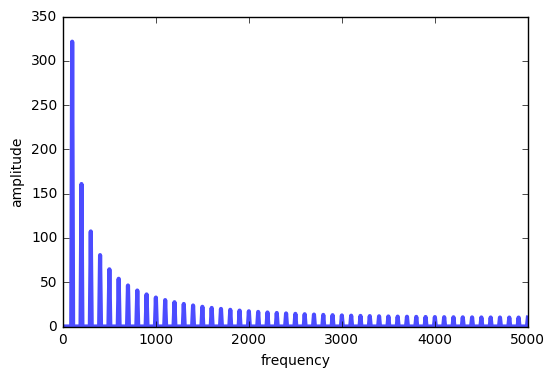

In [22]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2)